In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

In [6]:
#Perform Weather Check
weatherlist={}

for index in range(0,len(cities)):
    city=cities[index]
    print (f'processing record |{city}')
    url=f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&APPID={weather_api_key}'   

    response=requests.get(url)

    if response.status_code==200:

        weather_data=response.json()

        city_weather=[
            city,
            weather_data['clouds']['all'],
            weather_data['sys']['country'],
            weather_data['dt'],
            weather_data['main']['humidity'],
            weather_data['coord']['lat'],
            weather_data['coord']['lon'],
            weather_data['main']['temp_max'],
            weather_data['wind']['speed']
        ]
        
        weatherlist[index]=city_weather
    else:
        print('city not found. skipping')
print('------------------------------------------------------------')
print('data retrieval complete')
print('------------------------------------------------------------')

processing record |mataura
processing record |colares
processing record |kamaishi
processing record |busselton
processing record |provideniya
processing record |gorin
processing record |port blair
processing record |new norfolk
processing record |butaritari
processing record |kodiak
processing record |kokopo
processing record |arraial do cabo
processing record |lamar
processing record |chokurdakh
processing record |bluff
processing record |barrow
processing record |puerto ayora
processing record |sungairaya
processing record |castro
processing record |kirksville
processing record |hithadhoo
processing record |teknaf
processing record |khatanga
processing record |hobart
processing record |rikitea
processing record |bredasdorp
processing record |woodward
processing record |severo-kurilsk
processing record |harper
processing record |hermanus
processing record |nakama
processing record |kapaa
processing record |east london
processing record |lavrentiya
processing record |saskylakh
processi

city not found. skipping
processing record |half moon bay
processing record |volchikha
processing record |shkotovo-22
city not found. skipping
processing record |williams lake
processing record |beloha
processing record |privolnaya
processing record |khani
processing record |sao jose de piranhas
processing record |abu dhabi
processing record |vila franca do campo
processing record |alofi
processing record |rab
city not found. skipping
processing record |kahului
processing record |yumen
processing record |yambio
processing record |tiksi
processing record |walvis bay
processing record |tabulbah
city not found. skipping
processing record |tongchuan
processing record |rozkishne
processing record |cabatuan
processing record |mao
processing record |buckeye
processing record |sal rei
processing record |sukhoverkovo
city not found. skipping
processing record |san carlos de bariloche
processing record |nizhneyansk
city not found. skipping
processing record |vanavara
processing record |sayat


ConnectionError: ('Connection aborted.', TimeoutError(10060, 'A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond', None, 10060, None))

In [7]:
#Export City Data into a csv and Display the DataFrame
df=pd.DataFrame.from_dict(weatherlist,orient='index',columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])
df.to_csv(output_data_file, ",",header=True,columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'],index=True,index_label='City_ID')
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,100,NZ,1605352226,74,-46.19,168.86,61.00,8.01
1,colares,75,PT,1605352226,100,38.80,-9.45,66.00,8.05
2,kamaishi,20,JP,1605352033,75,39.27,141.88,41.00,5.82
3,busselton,51,AU,1605352226,69,-33.65,115.33,55.00,3.00
4,provideniya,0,RU,1605352227,90,64.38,-173.30,19.04,7.70
...,...,...,...,...,...,...,...,...,...
291,mao,20,ES,1605352262,88,39.89,4.27,66.20,5.82
292,buckeye,0,US,1605352155,29,33.37,-112.58,50.00,0.38
293,sal rei,0,CV,1605352262,69,16.18,-22.92,80.60,4.70
295,san carlos de bariloche,75,AR,1605352263,72,-41.15,-71.31,42.80,19.46


In [8]:
# Describe the DataFrame
df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,269.000000,2.690000e+02,269.000000,269.000000,269.000000,269.000000,269.000000
mean,51.156134,1.605352e+09,74.765799,18.022825,16.003048,55.175056,8.457695
std,39.333033,6.539155e+01,17.750578,35.798217,96.803970,27.726851,5.653419
min,0.000000,1.605352e+09,11.000000,-54.800000,-179.170000,-22.000000,0.270000
25%,5.000000,1.605352e+09,65.000000,-15.430000,-66.380000,37.000000,4.120000
50%,57.000000,1.605352e+09,78.000000,22.890000,23.370000,64.990000,6.960000
75%,90.000000,1.605352e+09,88.000000,47.670000,103.840000,78.280000,11.410000
max,100.000000,1.605352e+09,100.000000,78.220000,178.420000,91.530000,30.240000


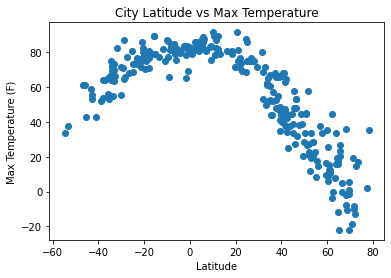

In [13]:
# Scatter Plot Lattitude vs Temperature
x=df['Lat']
y=df['Max Temp']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
plt.show()

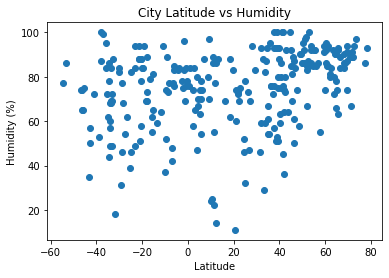

In [14]:
# Scatter Plot Lattitude vs Humidity
x=df['Lat']
y=df['Humidity']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.show()

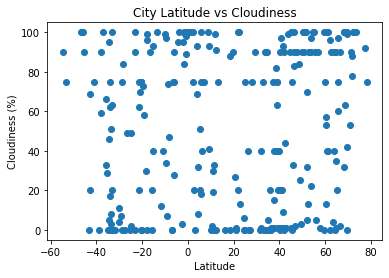

In [15]:
# Scatter Plot Lattitude vs Cloudiness
x=df['Lat']
y=df['Cloudiness']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.show()

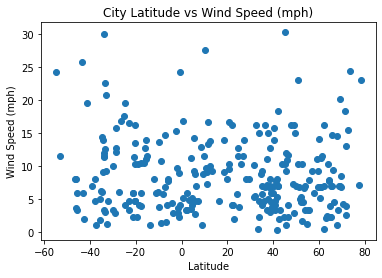

In [17]:
# Scatter Plot Lattitude vs Wind Speed
x=df['Lat']
y=df['Wind Speed']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (mph)')
plt.show()